In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('TimeSeries.csv')
df.head(5)
df = df.rename(columns={'Sales': 'y', 'Month':'ds'})

In [3]:
df.head(5)

,ds,y
0,2005-01,10827
1,2005-02,12049
2,2005-03,18298
3,2005-04,17834
4,2005-05,16480


In [4]:
df.tail(5)

,ds,y
148,2017-05,31739
149,2017-06,30315
150,2017-07,25046
151,2017-08,23285
152,2017-09,26721


In [5]:
df

,ds,y
0,2005-01,10827
1,2005-02,12049
2,2005-03,18298
3,2005-04,17834
4,2005-05,16480
...,...,...
148,2017-05,31739
149,2017-06,30315
150,2017-07,25046
151,2017-08,23285


In [6]:
df.columns

Index(['ds', 'y'], dtype='object')

In [8]:
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])

In [24]:
df

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121
5,1949-06,4.905275,135
6,1949-07,4.997212,148
7,1949-08,4.997212,148
8,1949-09,4.912655,136
9,1949-10,4.779123,119


In [9]:
model = Prophet() #instantiate Prophet
model.fit(df)

18:48:07 - cmdstanpy - INFO - Chain [1] start processing
18:48:07 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
df.tail(5)

,ds,y,y_orig
148,2017-05,2.338464,10.365301
149,2017-06,2.334025,10.319398
150,2017-07,2.315350,10.128469
151,2017-08,2.308126,10.055565
152,2017-09,2.321721,10.193205


In [13]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

df.tail(5)
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=24, freq = 'M')
future_data.tail(15)

,ds
162,2018-06-30
163,2018-07-31
164,2018-08-31
165,2018-09-30
166,2018-10-31
167,2018-11-30
168,2018-12-31
169,2019-01-31
170,2019-02-28
171,2019-03-31


In [14]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
162,2018-06-30,2.330293,2.315085,2.345678
163,2018-07-31,2.313277,2.297425,2.328701
164,2018-08-31,2.341845,2.324416,2.357583
165,2018-09-30,2.334795,2.316318,2.352215
166,2018-10-31,2.326736,2.307710,2.346274
167,2018-11-30,2.326755,2.305786,2.348539
168,2018-12-31,2.312610,2.290140,2.335348
169,2019-01-31,2.340520,2.316876,2.365029
170,2019-02-28,2.396704,2.371489,2.421926
171,2019-03-31,2.365311,2.336866,2.393525


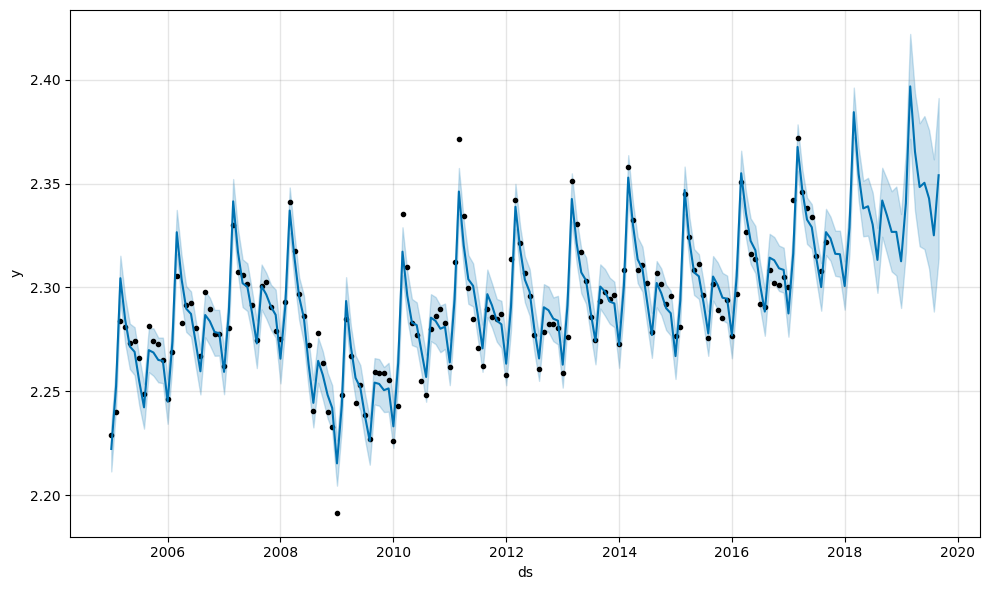

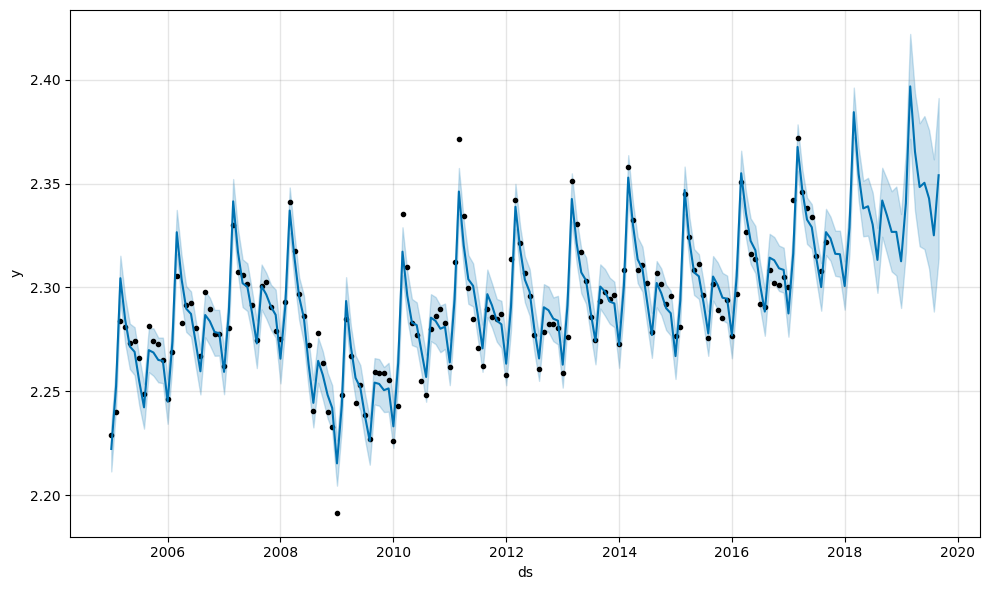

In [15]:
model.plot(forecast_data)

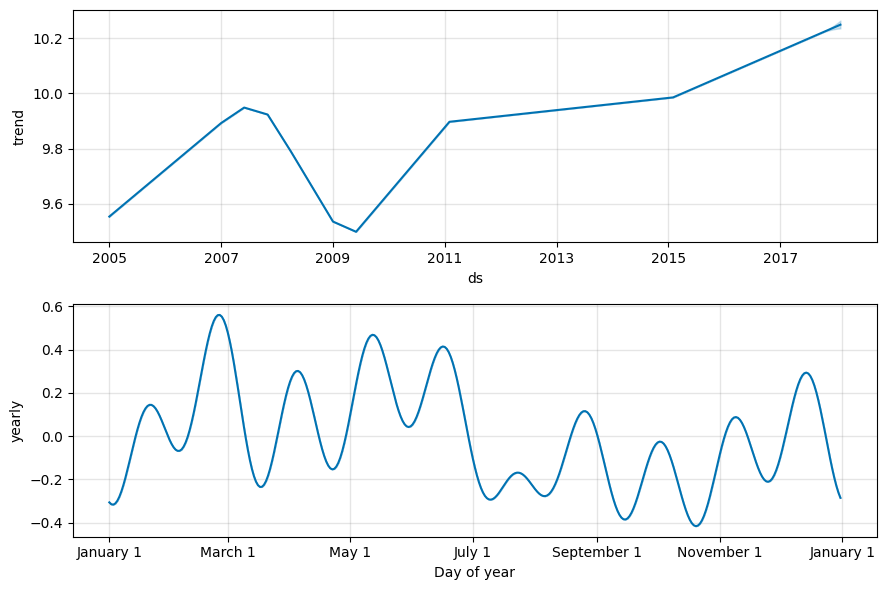

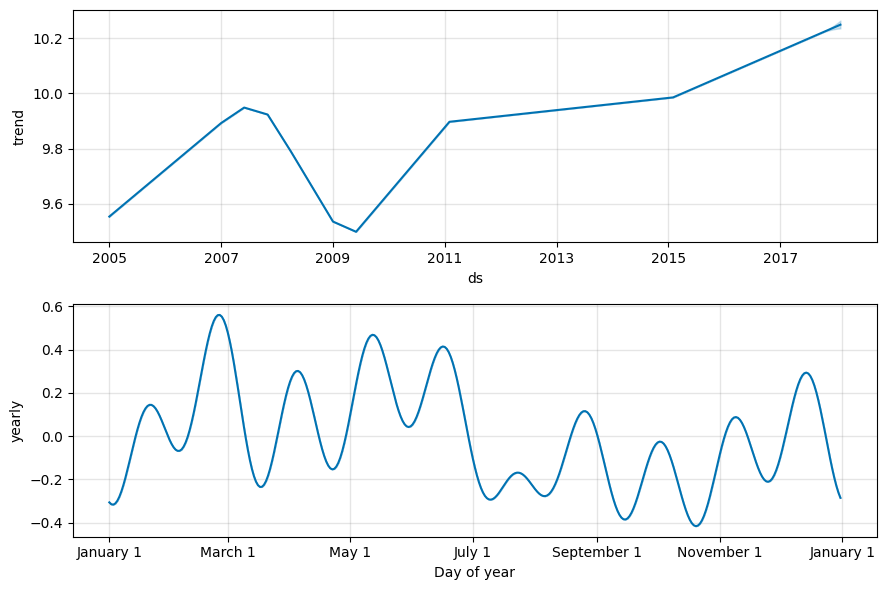

In [25]:
model.plot_components(forecast_data)

In [18]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

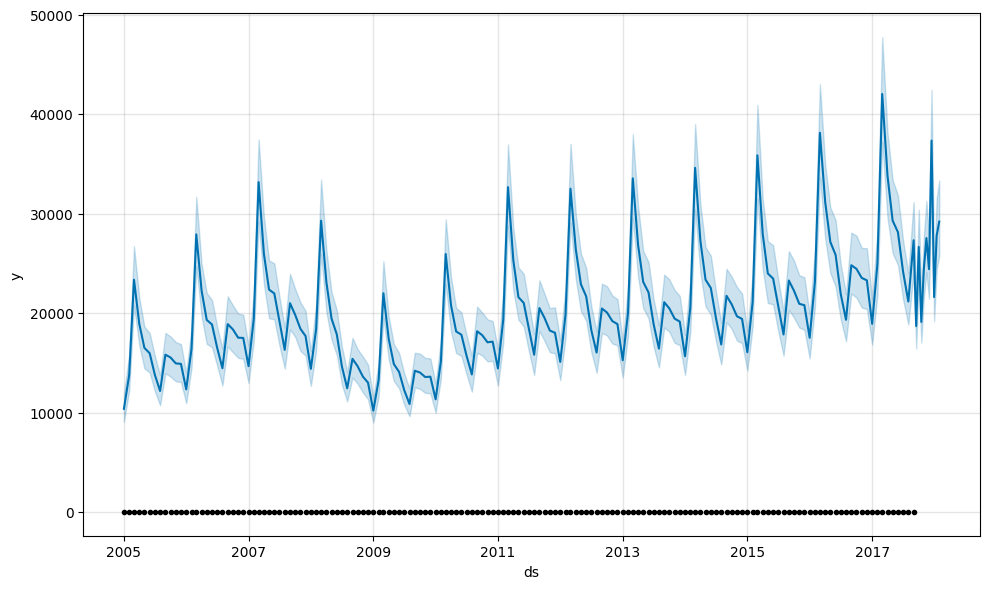

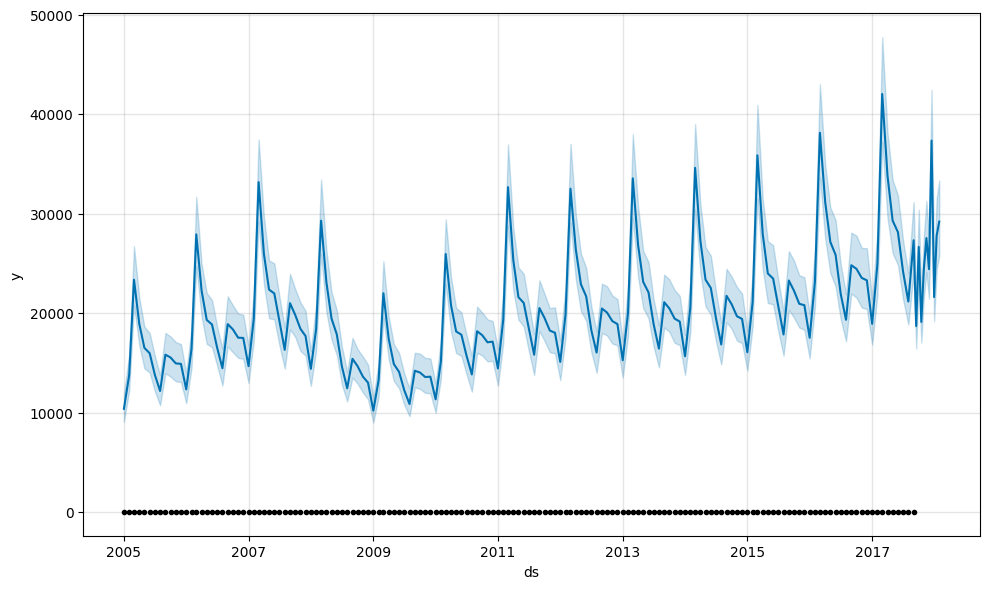

In [27]:
model.plot(forecast_data_orig)

In [16]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [19]:
final_df = pd.DataFrame(forecast_data_orig)

In [20]:
import plotly.graph_objs as go
import plotly.offline as py

In [21]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'